Dataset Referance: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

Importing libraries and packages

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the csv file of the Dataset of Audi cars as pandas DataFrame

In [67]:
df = pd.read_csv("audi.csv")

#Display the Data Set

display(df)

print("The first five rows of the data frame is:")
display(df.head(5))

print("The last five rows of the data frame is:")
display(df.tail(5))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,47.9,1.4


The first five rows of the data frame is:


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


The last five rows of the data frame is:


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
10663,A3,2020,16999,Manual,4018,Petrol,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,47.9,1.4
10667,Q3,2016,15999,Manual,11855,Petrol,47.9,1.4


Data Set Info

In [68]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


None

Function to find the number of observations for unique value in a column of the Data Set

In [69]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

Getting number of observation for unique value in a column of Dataframe

In [103]:
model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fuelType_count = unique_val_count(df, 'fuelType')

# sort the year_count DataFrame based on 'year'
year_count = year_count.sort_values(by='year')
# year_count

Function to show the number of observations for each unique value in a column using a barplot

In [72]:
def barplot(data, column_x, color, rotation, yticks):
    
    # barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # title for the plot
    plt.title("Number of cars present for each " + column_x)
    
    # lebel for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # provide a range for the yticks
    plt.yticks(yticks)

Creating subplots

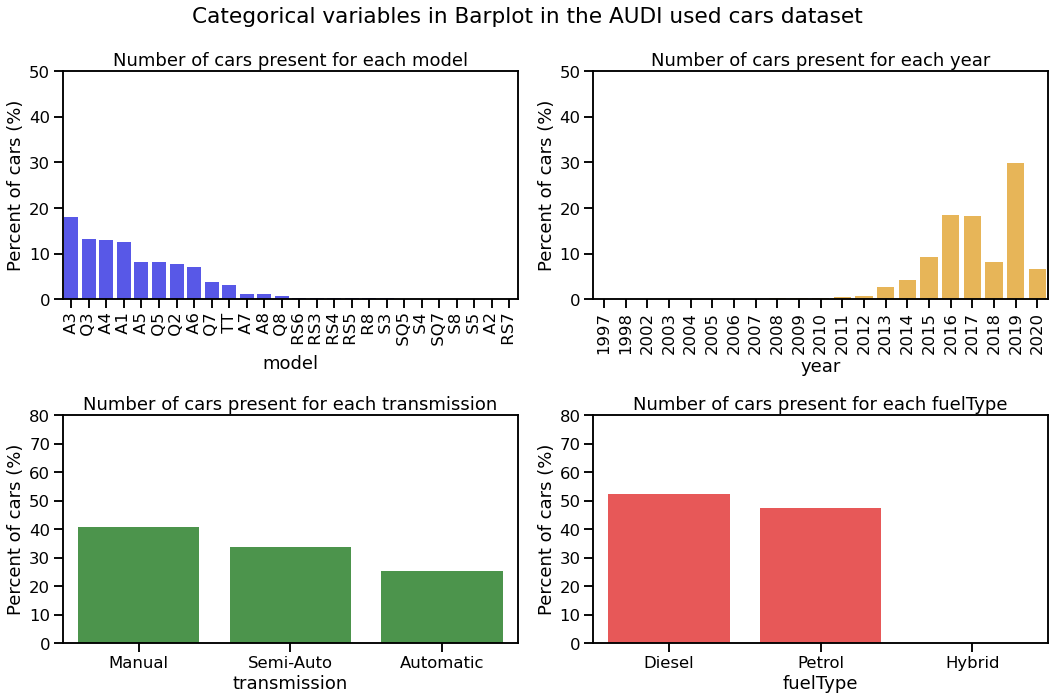

In [73]:
sns.set_context('talk')

plt.figure(figsize=(15,10))

# row 1, column 1
plt.subplot(2,2,1)
barplot(model_count, 'model', 'blue', 90, np.arange(0,51,10))

# row 1, column 2
plt.subplot(2,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(0,51,10))

# row 2, column 1
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,90,10))

# row 2, column 2
plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', 'red', 0, np.arange(0,90,10))

# title for all the plots
plt.suptitle("Categorical variables in Barplot in the AUDI used cars dataset")

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

These bar plot is showing us clear idea to make a comparison of the cars with different different categories. 

    1. Model Subplot: This plot is showing us A3 model cars have the most in number but more than 20% of total. 

    2. Year Subpolt: Year subplot is saying most of the cars have built in 2019 year. COVID-19 may cause of the large number of production decression of the year 2020.

    3. Transmission Subplot: This subplot is indicating more than 40% cars' transmission are manual.

    4. Fuel Type Subplot: This subplot is informing generally people use Diesel or Petrol as their car's fuel.

**Scatter Plot**

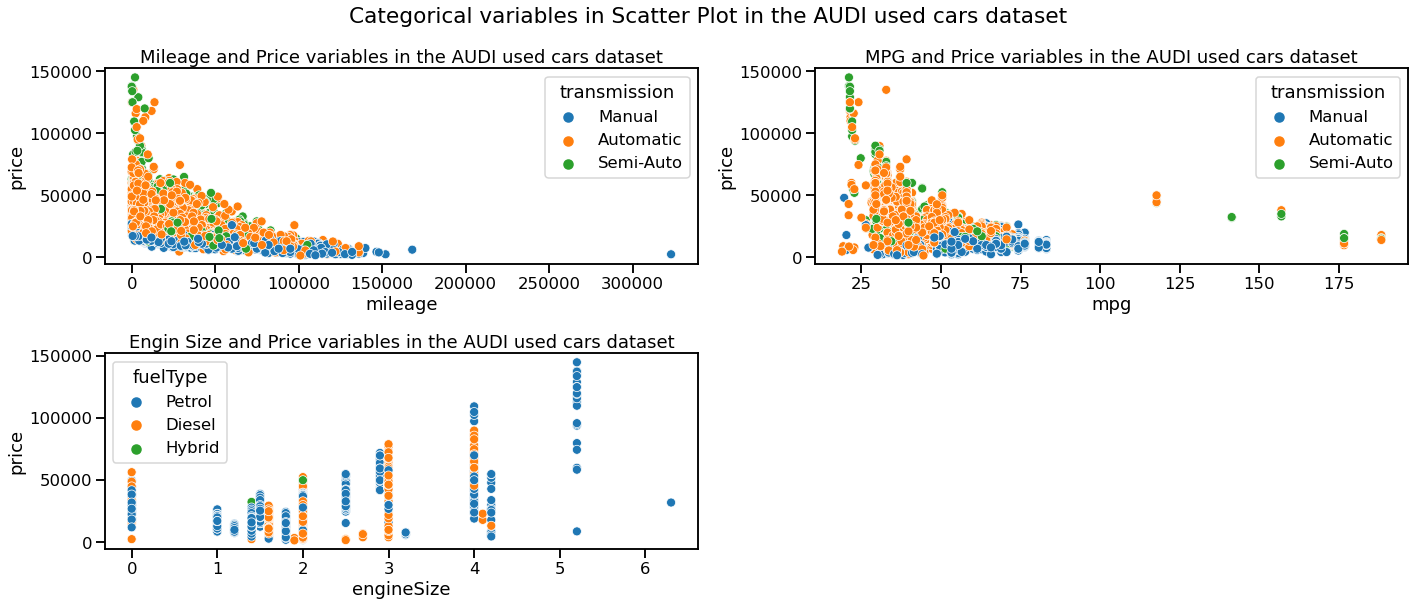

In [74]:
plt.figure(figsize=(20,12))

# mileage vs price
plt.subplot(3,2,1)
sns.scatterplot(x='mileage', y='price', data=df, hue='transmission')
plt.title("Mileage and Price variables in the AUDI used cars dataset")

# mpg vs price
plt.subplot(3,2,2)
sns.scatterplot(x='mpg', y='price', data=df, hue='transmission')
plt.title("MPG and Price variables in the AUDI used cars dataset")

# engineSize vs price
plt.subplot(3,2,3)
sns.scatterplot(x='engineSize', y='price', data=df, hue='fuelType')
plt.title("Engin Size and Price variables in the AUDI used cars dataset")

# Title
plt.suptitle("Categorical variables in Scatter Plot in the AUDI used cars dataset")

# rotate the xticks 
plt.xticks()
    
# provide a range for the yticks
plt.yticks()

plt.tight_layout()
plt.show()

These scatter plot is showing us clear idea to make a comparison of the cars with different different categories. 

    1. Mileage vs Price Subplot: This plot is showing us Semi-Auto cars are most expensive in the most cases with Automatic cars also sometimes. Where Manual cars are not so costly. And also Prices are decreasing gradualy when Mileages are increasing.

    2. MPG vs Price Subpolt:

    3. Transmission Subplot: This subplot is indicating more than 40% cars' transmission are manual.

    4. Fuel Type Subplot: This subplot is informing generally people use Diesel or Petrol as their car's fuel.

**Histogram**

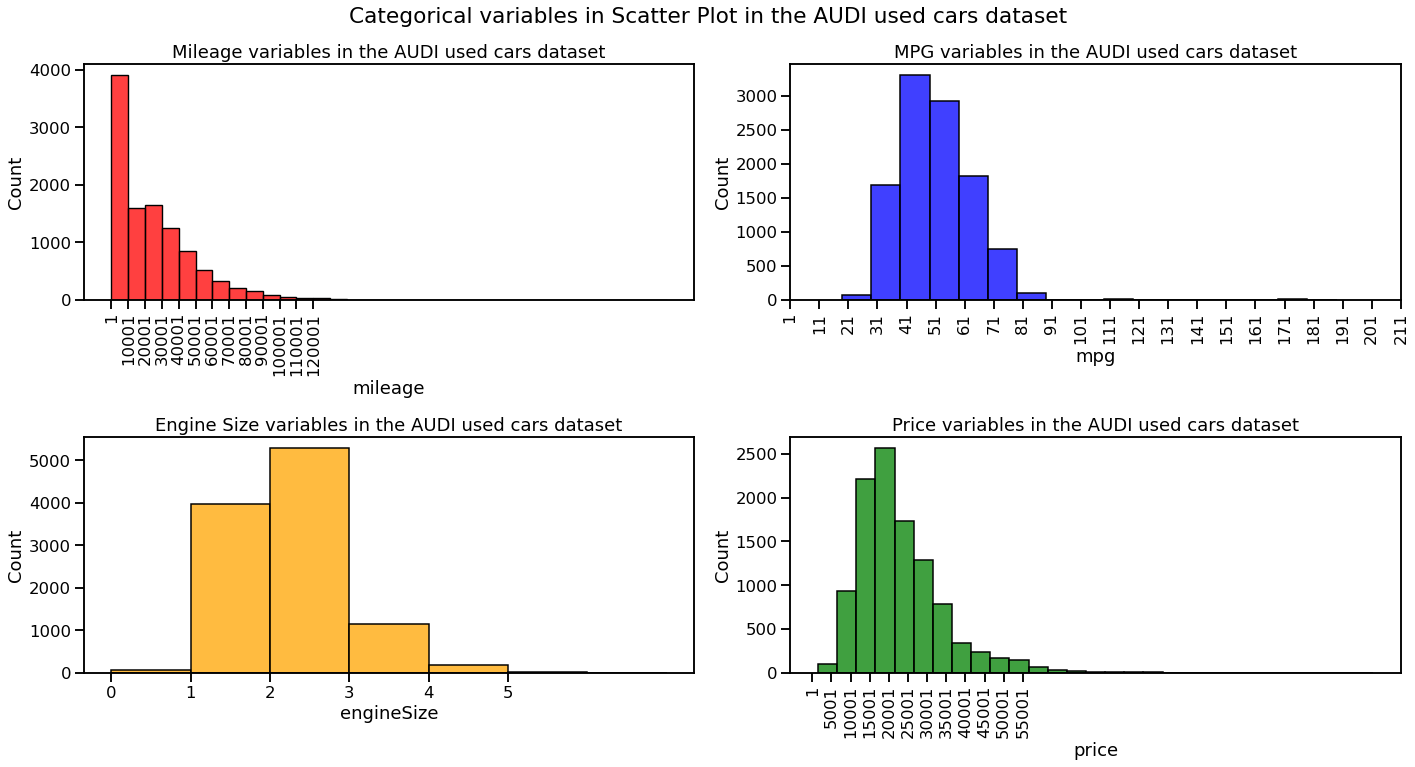

In [121]:
plt.figure(figsize=(20,15))

# Title
plt.suptitle("Categorical variables in Scatter Plot in the AUDI used cars dataset")

#subplot row1 column1 milage 
plt.subplot(3,2,1)
sns.histplot(data=df, x='mileage' , binwidth=10000 , color= "r" )
plt.xticks(np.arange(1,127801,10000), rotation=90)
plt.title("Mileage variables in the AUDI used cars dataset")

#subplot row1 column2 miles per gallon 
plt.subplot(3,2,2)
sns.histplot(data=df, x='mpg' , binwidth=10 , color= "blue")
plt.xticks(np.arange(1,212,10), rotation=90)
plt.title("MPG variables in the AUDI used cars dataset")

#subplot row2 column1 engine size
plt.subplot(3,2,3)
sns.histplot(data=df, x='engineSize', binwidth=1 , color= "orange")
plt.xticks(np.arange(0,6,1), rotation=0)
plt.title("Engine Size variables in the AUDI used cars dataset")

#subplot row2 column2 price
plt.subplot(3,2,4)
sns.histplot(data=df, x='price', binwidth=5000 , color= "green")
plt.xticks(np.arange(1,56001,5000), rotation=90)
plt.title("Price variables in the AUDI used cars dataset")

# rotate the xticks
plt.xticks()
    
# provide a range for the yticks
plt.yticks()

plt.tight_layout()
plt.show()

**Distribution Plot**

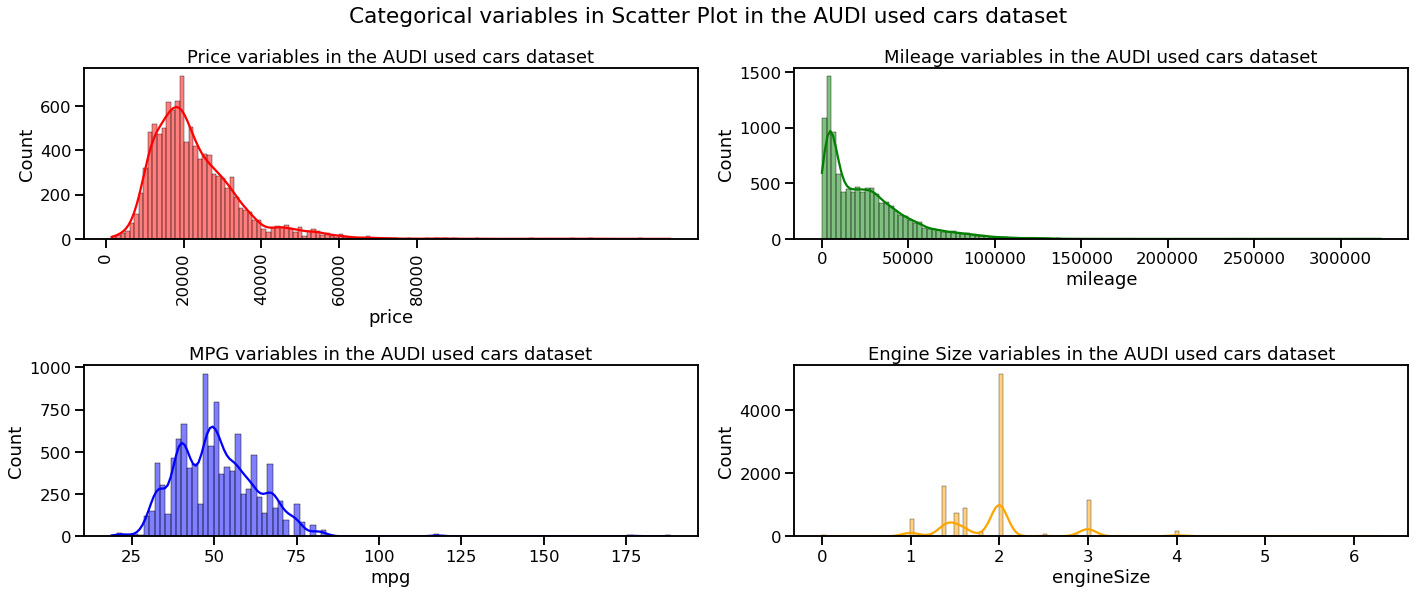

In [63]:
plt.figure(figsize=(20,12))

# Title
plt.suptitle("Categorical variables in Scatter Plot in the AUDI used cars dataset")

#subplot row1 column1 price 
plt.subplot(3,2,1)
sns.histplot(data=df, x='price', kde=True, color= "r")
plt.xticks(np.arange(0,80800,20000), rotation=90)
plt.title("Price variables in the AUDI used cars dataset")

#subplot row1 column2 milage 
plt.subplot(3,2,2)
sns.histplot(data=df, x='mileage' , kde=True , color= "green" )
plt.title("Mileage variables in the AUDI used cars dataset")

#subplot row2 column1 miles per gallon 
plt.subplot(3,2,3)
sns.histplot(data=df, x='mpg' , kde=True , color= "blue")
plt.title("MPG variables in the AUDI used cars dataset")

#subplot row2 column2 engine size
plt.subplot(3,2,4)
sns.histplot(data=df, x='engineSize', kde=True , color= "orange")
plt.ylabel("Percent of cars (%)")

# rotate the xticks
plt.xticks()
    
# provide a range for the yticks
plt.yticks()

plt.tight_layout()
plt.show()

**ECDF Plot**

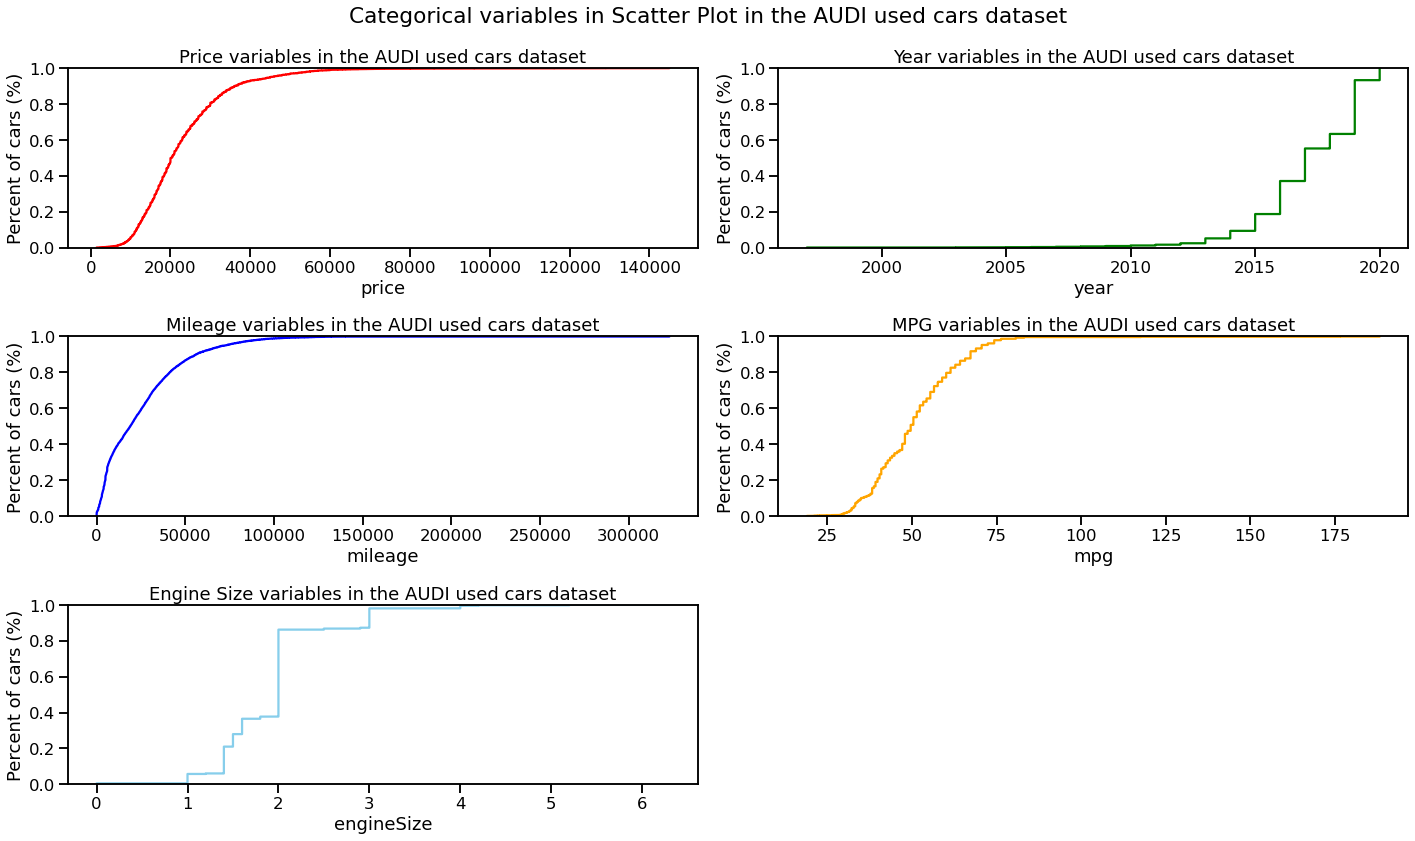

In [116]:
plt.figure(figsize=(20,12))

# Title
plt.suptitle("Categorical variables in Scatter Plot in the AUDI used cars dataset")

#subplot row1 column1 price 
plt.subplot(3,2,1)
sns.ecdfplot(data=df, x='price', color= "red")
plt.ylabel("Percent of cars (%)")
plt.title("Price variables in the AUDI used cars dataset")

#subplot row1 column2 year 
plt.subplot(3,2,2)
sns.ecdfplot(data=df, x='year' , color= "green")
plt.ylabel("Percent of cars (%)")
plt.title("Year variables in the AUDI used cars dataset")

#subplot row2 column1 milage 
plt.subplot(3,2,3)
sns.ecdfplot(data=df, x='mileage', color= "blue")
plt.ylabel("Percent of cars (%)")
plt.title("Mileage variables in the AUDI used cars dataset")

#subplot row2 column2 miles per gallon 
plt.subplot(3,2,4)
sns.ecdfplot(data=df, x='mpg' , color= "orange")
plt.ylabel("Percent of cars (%)")
plt.title("MPG variables in the AUDI used cars dataset")

#subplot row3 column1 engine size
plt.subplot(3,2,5)
sns.ecdfplot(data=df, x='engineSize', color= "skyblue")
plt.ylabel("Percent of cars (%)")
plt.title("Engine Size variables in the AUDI used cars dataset")

# rotate the xticks
plt.xticks()
    
# provide a range for the yticks
plt.yticks()

plt.tight_layout()
plt.show()

**Violin Plot**

In [101]:
# def unique_val_count(data, column):
#     df_count = df[column].value_counts()
#     df_count = pd.DataFrame(df_count)
#     df_count = df_count.reset_index()
#     df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
#     df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
#     return df_count

In [104]:
# model_count = unique_val_count(df, 'model')
# year_count = unique_val_count(df, 'year')
# transmission_count = unique_val_count(df, 'transmission')
# fuelType_count = unique_val_count(df, 'fuelType')

# # sort the year_count DataFrame based on 'year'
# year_count = year_count.sort_values(by='year')
# # year_count

In [105]:
# def violinplot(column_x, data, color):
    
#     # violinplot using seaborn
#     sns.violinplot(x=column_x, data=data, color=color)
    
#     # title for the plot
#     plt.title("Number of cars present for each " + column_x)
    
#     # lebel for the x and y axis
#     plt.xlabel(column_x)
#     plt.ylabel("Percent of cars (%)")
    
#     # rotate the xticks if necessary
#     # plt.xticks(rotation=rotation)
    
#     # provide a range for the yticks
#     plt.yticks(yticks)

In [107]:
# plt.figure(figsize=(15,10))

# # row 1, column 1
# # plt.subplot(2,2,1)
# violinplot(mileage_count, df, 'blue')

# # # row 1, column 2
# # plt.subplot(2,2,2)
# # violinplot('year', 'orange', np.arange(0,51,10))

# # # row 2, column 1
# # plt.subplot(2,2,3)
# # violinplot('mpg', 'green', np.arange(0,90,10))

# # # row 2, column 2
# # plt.subplot(2,2,4)
# # violinplot('engineSize', 'red', np.arange(0,90,10))

# # title for all the plots
# plt.suptitle("Categorical variables in Barplot in the AUDI used cars dataset")

# # keep the individual plots separate from each other
# plt.tight_layout()

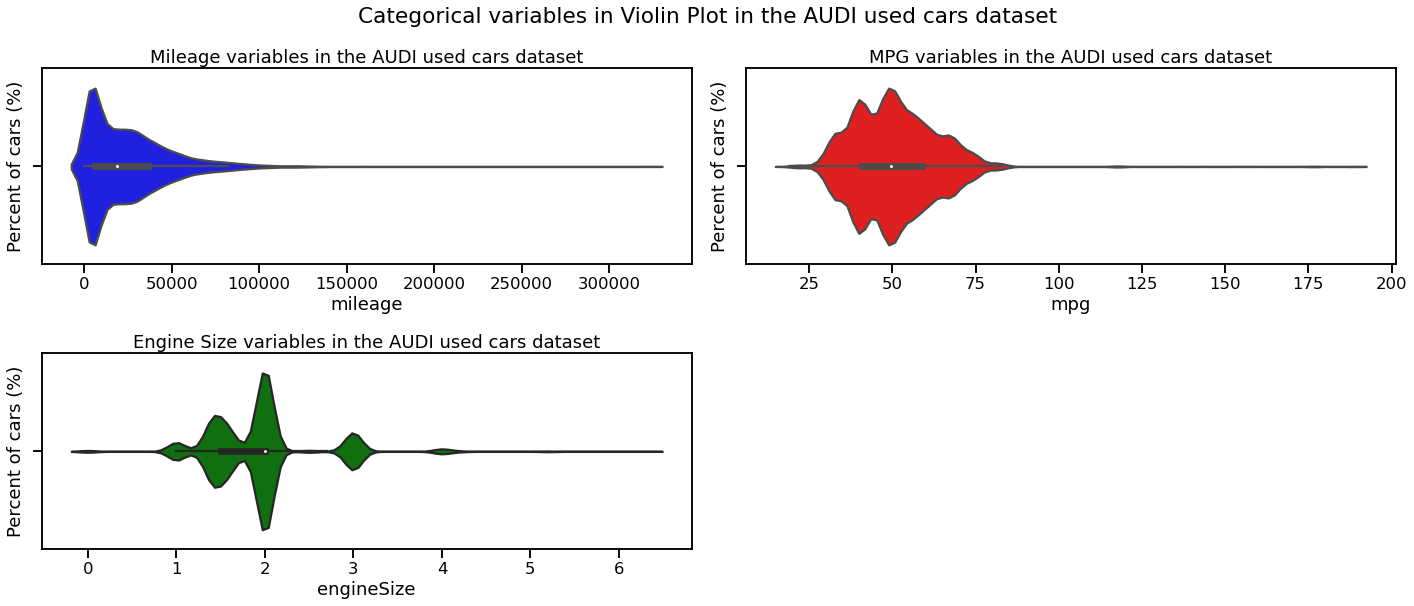

In [122]:
#Define Figure Size
plt.figure(figsize=(20,12))

# Title
plt.suptitle("Categorical variables in Violin Plot in the AUDI used cars dataset")

#subplot row1 column1 Mileage
plt.subplot(3,2,1)
sns.violinplot(x='mileage', data = df, color="blue")
plt.ylabel("Percent of cars (%)") # Labeling Y Axis
plt.title("Mileage variables in the AUDI used cars dataset") #Title of this Subplot

#subplot row1 column2 MPG
plt.subplot(3,2,2)
sns.violinplot(x='mpg', data = df, color="red")
plt.ylabel("Percent of cars (%)") # Labeling Y Axis
plt.title("MPG variables in the AUDI used cars dataset") #Title of this Subplot

#subplot row2 column1 Engine Size
plt.subplot(3,2,3)
sns.violinplot(x='engineSize', data = df, color="green")
plt.ylabel("Percent of cars (%)") # Labeling Y Axis
plt.title("Engine Size variables in the AUDI used cars dataset") #Title of this Subplot

# rotate the xticks
plt.xticks()
    
# provide a range for the yticks
plt.yticks()

plt.tight_layout()
plt.show()

These violin plot is showing us clear idea to make a comparison of the cars with different different categories. 

    1. Mileage Subplot: This plot is showing us when mileage is low, the number of cars are much. When the mileage is getting increase, so many cars may not be used or may be destroyed. 

    2. MPG Subpolt: MPG subplot is helping us to understand most of the cars' MPGs are between 45 to 60.

    3. Engine Size Subplot: This subplot is not providing any sequential data. Most of the cars' entgin size is showing in position 2 unit.
